## Григорьев Дмитрий, вариант 3.
### Импортируем необходимые модули 
### + наш модуль.

In [1]:
from mft2 import PolLagrange, bisection
import matplotlib.pyplot as plt             #Для построения графиков
from scipy.optimize import root_scalar      #Для поиска корня
from pandas import DataFrame                #Для построения таблиц
from math import sin

# Начальные данные.
### Функция $f(x)=\sin(x), \\ y_0 = -0.1912$
### В общем случае, конечно, будет дана таблица x,f(x).

In [2]:
f = lambda x: sin(x)
nodes = [0, 2, 4, 5, 7, 10] #Можно задать узлы, а можно и отрезок задать. 
a, b = min(nodes), max(nodes)
val = -0.1912
values = [f(nodes[i]) for i in range(len(nodes))] #В табличном случае -- список значений

## Интерполируем по Лагранжу.
## Тут же начинаем поиск корня.

In [3]:
polynom = PolLagrange(nodes, values)
ans = bisection(polynom, val, a, b, 10**(-7))

## Графики для наглядности и сводная таблица

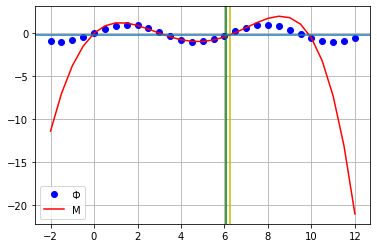

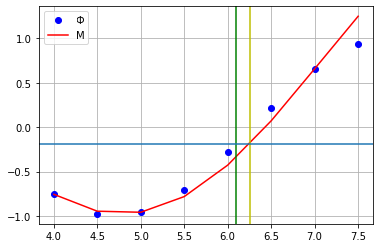

,0,1,2
"Ответ, полученный нами",6.252543,9.912030,3.229654
"Ответ, полученный через модуль scipy",6.090801,9.617163,3.333977
Фактическая погрешность,0.161742,0.294867,-0.104323
Фактическая погрешность по значению,0.160562,-0.276999,0.103253
Потребовавшееся число итераций в методе Ньютона,6.000000,7.000000,7.000000


In [4]:
real_root = (root_scalar(lambda x: f(x)-val , method = 'bisect', bracket=[3, 5])).root
real_roots = [(root_scalar(lambda x: f(x)-val , method = 'bisect', bracket=[ans[i][0] - 2, ans[i][0] + 2])).root for i in range(len(ans))]
a, b = (2*int(ans[0][0]-2), 2*int(ans[0][0]+2))
plot0 = plt.plot([x*1./2 for x in range(-4, 25)],[f(x*1./2) for x in range(-4, 25)],'bo',
                [x*1./2 for x in range(-4, 25)],[polynom.get_value(x*1./2) for x in range(-4, 25)],'r')
plt.grid()
plt.axvline(ans[0][0], 0, 1, color = 'y')
plt.axvline(real_roots[0], 0, 2, color = 'g')
plt.axhline(val, 0, 1)
plt.legend("ФМ")
plt.show()

plot = plt.plot([x*1./2 for x in range(a, b)],[f(x*1./2) for x in range(a, b)],'bo',
                [x*1./2 for x in range(a, b)],[polynom.get_value(x*1./2) for x in range(a, b)],'r')
plt.grid()
plt.axvline(ans[0][0], 0, 1, color = 'y')
plt.axvline(real_roots[0], 0, 2, color = 'g')
plt.axhline(val, 0, 1)
plt.legend("ФМ")
plt.show()

dataframe = DataFrame([[ans[i][0] for i in range(len(ans))], real_roots,
                       [ans[i][0] - real_roots[i] for i in range(len(ans))],
                       [f(ans[i][0]) - val for i in range(len(ans))],
                       [int(ans[i][1]) for i in range(len(ans))]],
                      index = ["Ответ, полученный нами",
                               "Ответ, полученный через модуль scipy",
                               "Фактическая погрешность",
                               "Фактическая погрешность по значению",
                               "Потребовавшееся число итераций в методе Ньютона"])

dataframe